## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
import dataframe_image as dfi
import folium
from IPython.display import Image
from PIL import Image
%matplotlib inline
import cartopy.crs as ccrs

## Reading Dataset

In [2]:
usa_df = gpd.read_file('../Data/usa_data/map.shp')

## Checking top 5 values

In [3]:
usa_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,20,175,00485050,0500000US20175,20175,Seward,06,1655865960,2777350,"POLYGON ((-101.06790 37.38778, -100.65273 37.3..."
1,28,141,00695791,0500000US28141,28141,Tishomingo,06,1098939230,52359814,"POLYGON ((-88.36353 34.99575, -88.25811 34.995..."
2,36,101,00974148,0500000US36101,36101,Steuben,06,3601566799,34993606,"POLYGON ((-77.72296 42.47122, -77.72062 42.535..."
3,50,013,01461763,0500000US50013,50013,Grand Isle,06,211894597,292303559,"POLYGON ((-73.38997 44.61962, -73.36556 44.700..."
4,05,065,00066860,0500000US05065,05065,Izard,06,1503685418,8912603,"POLYGON ((-92.21390 36.17510, -92.15986 36.173..."


## Plotting Graph

<Axes: >

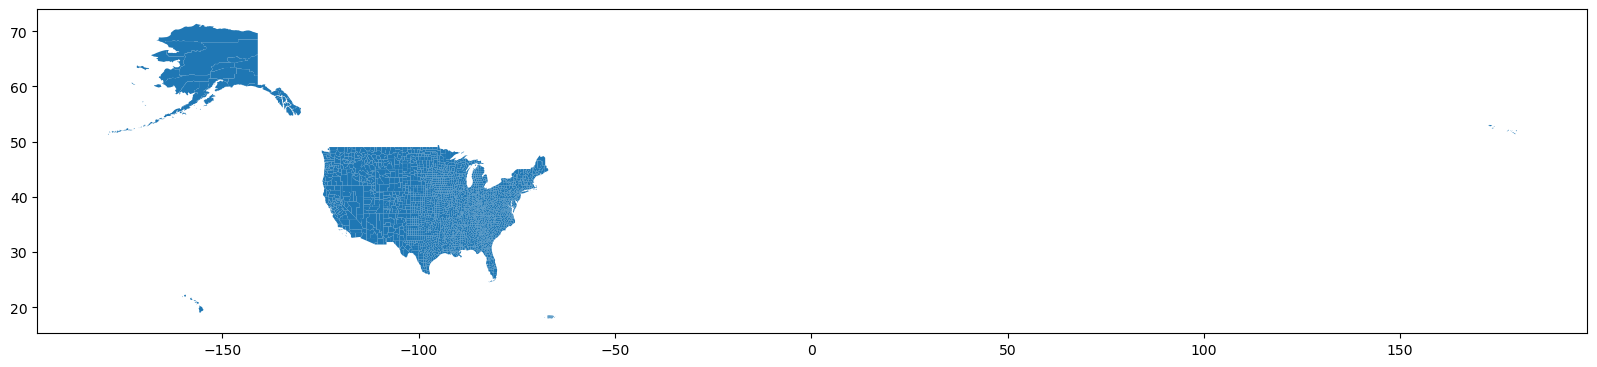

In [4]:
usa_df.plot(figsize = (20,20))

## Changing the co-ordinates of X & Y axis to plot graph

(20.0, 50.0)

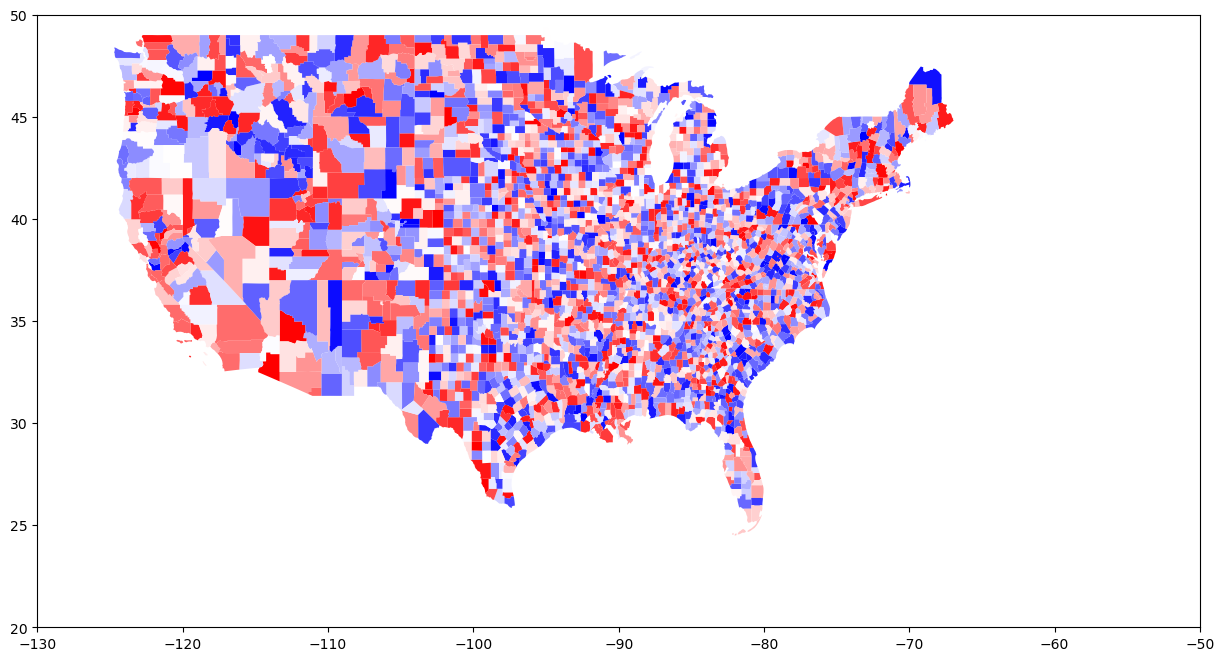

In [5]:
# Colours which can be used in cmap
#cmap = 'bwr' | 'GnBu' | 'jet'

ax = usa_df.plot(figsize = (15,15), column = 'NAME', cmap = 'bwr') #facecolor = '#00000050', edgecolor = 'blue')
ax.set_xlim(-130,-50)
ax.set_ylim(20,50)
#ax.plot(ax=ax, markersize = 15)

## Checking CRS

In [6]:
usa_df.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

## Using .to_crs() function

In [7]:
usa_EPSG_4326_df = usa_df.to_crs('EPSG:4326')

(20.0, 50.0)

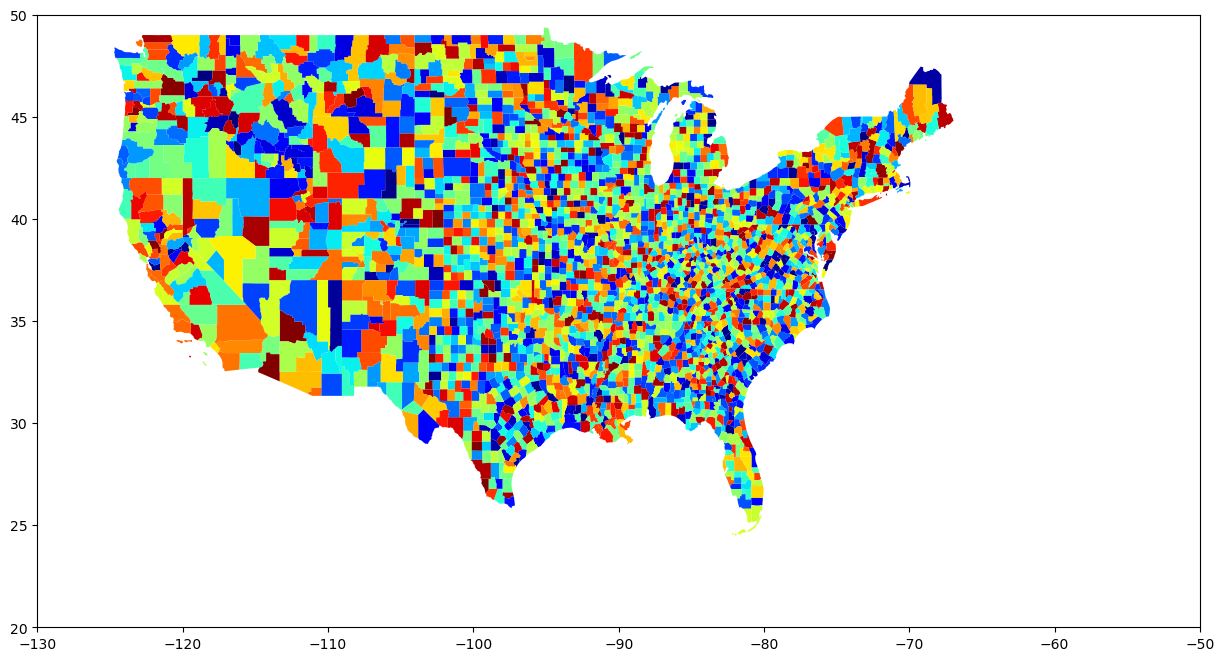

In [8]:
bx = usa_EPSG_4326_df.plot(figsize = (15,15), column = 'NAME', cmap = 'jet')
bx.set_xlim(-130,-50)
bx.set_ylim(20,50)

## pyproj function

### pyproj.CRS()

### 'pyproj.CRS()'  is a method from the PyProj library that creates a Coordinate Reference System (CRS) object. The CRS() method takes a string argument representing the EPSG (European Petroleum Survey Group) code of the CRS. The EPSG code is a unique identifier for a CRS and can be used to identify and transform coordinates between different CRSs.

In [9]:
import pyproj

# create a CRS object for WGS 84
crs_wgs84 = pyproj.CRS("EPSG:4326")

In [10]:
crs_wgs84

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World: Afghanistan, Albania, Algeria, American Samoa, Andorra, Angola, Anguilla, Antarctica, Antigua and Barbuda, Argentina, Armenia, Aruba, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belgium, Belgium, Belize, Benin, Bermuda, Bhutan, Bolivia, Bonaire, Saint Eustasius and Saba, Bosnia and Herzegovina, Botswana, Bouvet Island, Brazil, British Indian Ocean Territory, British Virgin Islands, Brunei Darussalam, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Canada, Cape Verde, Cayman Islands, Central African Republic, Chad, Chile, China, Christmas Island, Cocos (Keeling) Islands, Comoros, Congo, Cook Islands, Costa Rica, Côte d'Ivoire (Ivory Coast), Croatia, Cuba, Curacao, Cyprus, Czechia, Denmark, Djibouti, Dominica, Dominican Republic, East Timor, Ecuador, Egypt, El Salvador, Equatoria

In [11]:
# create a CRS object for UTM zone 10N
crs_utm10n = pyproj.CRS("EPSG:32610")

In [12]:
crs_utm10n

<Derived Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## pyproj.transform()

### pyproj.transform() is a method from the PyProj library that allows you to transform coordinates between different Coordinate Reference Systems (CRSs). The method takes four arguments: the source CRS, the destination CRS, the x-coordinate, and the y-coordinate.

In [13]:
# create CRS objects for WGS 84 and UTM zone 10N
crs_wgs84 = pyproj.CRS("EPSG:4326")
crs_utm10n = pyproj.CRS("EPSG:32610")

# define a point in WGS 84 coordinates (longitude, latitude)
lon, lat = -118.409, 33.943

# transform the point to UTM 10N coordinates (eastings, northings)
easting, northing = pyproj.transform(crs_wgs84, crs_utm10n, lon, lat)

C:\Users\GOD\AppData\Local\Temp\ipykernel_17000\2666363745.py:9: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  easting, northing = pyproj.transform(crs_wgs84, crs_utm10n, lon, lat)


## Basemap

## Basemap is a library that allows you to create maps and work with CRSs.

###  'Basemap()'  is a method from the Basemap library, which is a deprecated library for creating static maps in Python. It allows you to create map projections and plot data on them using a variety of built-in map projections, including cylindrical, conic, and azimuthal projections

In [18]:
# To install basemap

# !pip install basemap
# !pip install basemap-data

In [26]:
!pip install basemap
!pip install basemap-data

  Using cached basemap-1.3.6-cp310-cp310-win_amd64.whl (487 kB)
  Using cached matplotlib-3.6.3-cp310-cp310-win_amd64.whl (7.2 MB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\GOD\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



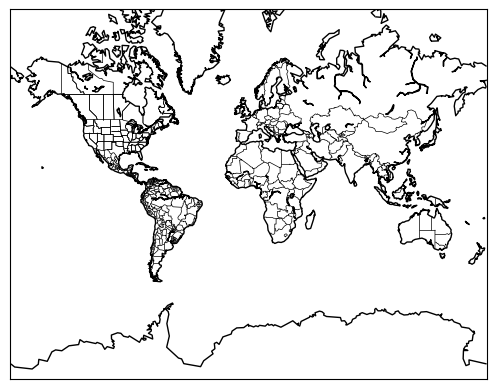

In [28]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# create a map projection centered on the Pacific Ocean
m = Basemap(projection='merc', llcrnrlon=-180, llcrnrlat=-80, urcrnrlon=180, urcrnrlat=80)

# draw coastlines, countries, and states
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# show the map
plt.show()

In [29]:
# create a Plate Carrée CRS object
crs_platecarree = ccrs.PlateCarree()

# create a UTM zone 10N CRS object
crs_utm10n = ccrs.UTM(zone=10, southern_hemisphere=False)

# Cartopy

C:\Users\GOD\anaconda3\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


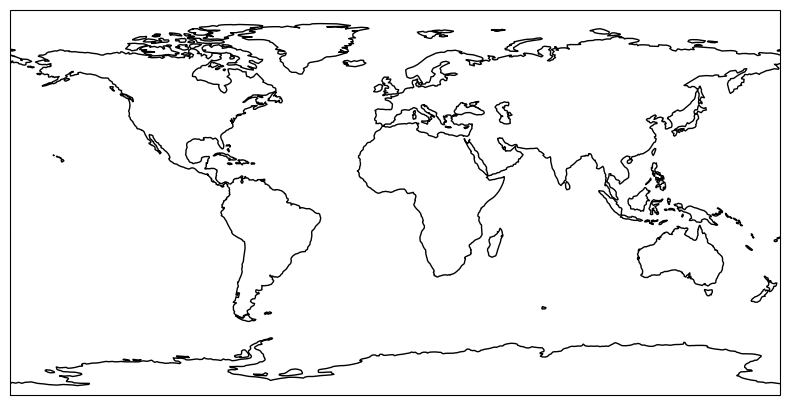

In [30]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
plt.show()

### cartopy.crs() is a method from the Cartopy library that allows you to create a Coordinate Reference System (CRS) object for use in geospatial data processing and mapping. The method takes a string argument representing the CRS name, such as "PlateCarree" or "Robinson", or an EPSG code representing the CRS.

In [31]:
import cartopy.crs as ccrs

# create a Plate Carrée CRS object
crs_platecarree = ccrs.PlateCarree()

# create a UTM zone 10N CRS object
crs_utm10n = ccrs.UTM(zone=10, southern_hemisphere=False)

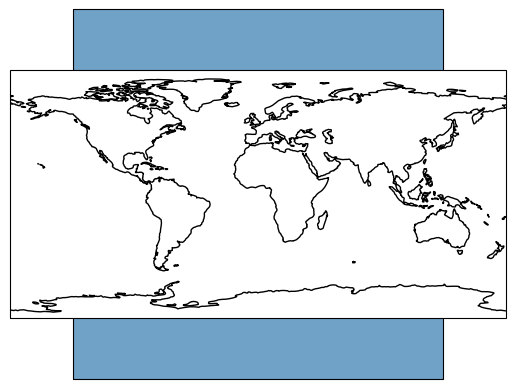

In [36]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pyproj

# create a CRS object for the source CRS
src_crs = pyproj.CRS('EPSG:4326') # WGS84

# create a CRS object for the destination CRS
dst_crs = ccrs.Mercator()

# create a pyproj Transformer object to transform from src_crs to dst_crs
transformer = pyproj.Transformer.from_crs(src_crs, dst_crs)

# transform a point from src_crs to dst_crs using transform_point()
lon, lat = -122.4194, 37.7749 # San Francisco
x, y = transformer.transform(lon, lat)

# create a new figure and axes in the destination CRS
fig, ax = plt.subplots(subplot_kw={'projection': dst_crs})

# plot some geospatial data in the destination CRS
ax.stock_img()
ax.coastlines()

# set the extent of the axes to the desired region in the destination CRS
ax.set_extent([-122.5, -121.5, 37, 38], crs=dst_crs)

# plot the transformed point on the map
ax.plot(x, y, 'ro')

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()

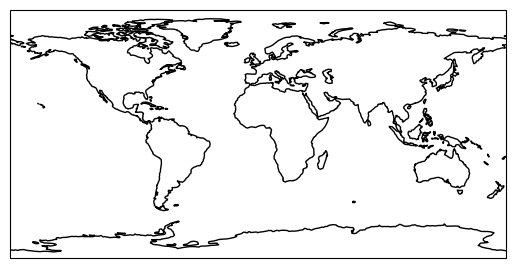

In [37]:
import cartopy.mpl.geoaxes as geoaxes

# create a map projection using Plate Carrée
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()

# transform a point from Plate Carrée to UTM zone 10N
point_in_platecarree = (lon, lat)
point_in_utm10n = crs_utm10n.transform_point(lon, lat, crs_platecarree)